In [3]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2

import os
import numpy as np
import random

In [7]:
cocoRoot = "/root/code_dir/ControlNet_Seg/datasets/fscoco"

annFile = os.path.join(cocoRoot,f"instances_val2017.json")
print(annFile)

/root/code_dir/ControlNet_Seg/datasets/fscoco/instances_val2017.json


In [8]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=1.15s)
creating index...
index created!


In [80]:
# 获取id和类别

# 利用getCatIds函数获取某个类别的ID
ids = coco.getCatIds('banana')[0]
print(ids) 

# 利用loadCats获取序号对应的文字类别
cats = coco.loadCats(56)
print(cats)

52
[{'supercategory': 'food', 'id': 56, 'name': 'broccoli'}]


In [74]:
# 获取满足特定条件的图片
# 获取包含sheep的所有图片
imgIds = coco.getImgIds(catIds=ids)
# imgIds = np.array(imgIds).reshape(5,13)
print(len(imgIds))

103


560256
/root/code_dir/ControlNet_Seg/datasets/fscoco/val2017/000000560256.jpg


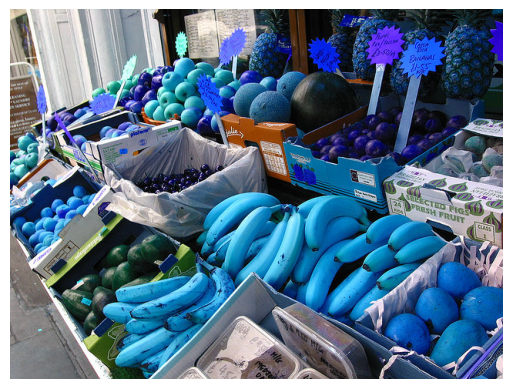

In [77]:
# 展示图片信息

imgId = imgIds[20]
print(imgId)
imgInfo = coco.loadImgs(imgId)[0]
# print(f"图片的信息如下:\n{imgInfo}")

imgPath = os.path.join(cocoRoot,"val2017",imgInfo["file_name"])
print(imgPath)

img = cv2.imread(imgPath)
plt.axis("off")
plt.imshow(img)
plt.show()

图像560256包含28个ann对象，分别是:
[1045014, 1045249, 1046304, 1046463, 1046492, 1046518, 1053025, 1053106, 1548853, 1550038, 1550834, 1550979, 1551345, 1551488, 1551809, 1552230, 1552284, 1552354, 1552394, 2111673, 2187549, 2187599, 2187652, 2187671, 2187678, 2187683, 2187691, 905300560256]


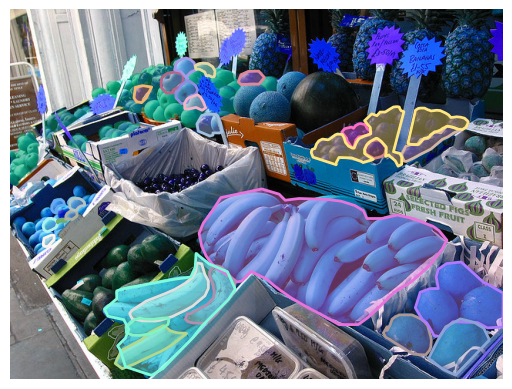

In [78]:
# 获取土相对应的anns的Id
plt.imshow(img); plt.axis('off')
annIds = coco.getAnnIds(imgIds=imgInfo["id"])
anns = coco.loadAnns(annIds)
print(f'图像{imgInfo["id"]}包含{len(anns)}个ann对象，分别是:\n{annIds}')

coco.showAnns(anns)

ann1046463对应的mask如下：
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(-0.5, 639.5, 479.5, -0.5)

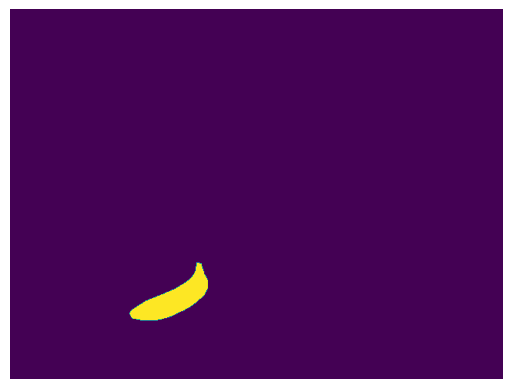

In [87]:
print(f'ann{annIds[3]}对应的mask如下：')
mask1 = coco.annToMask(anns[0])
print(mask1)
mask2 = coco.annToMask(anns[1])
plt.imshow(mask1)
# plt.imshow(mask2)
plt.axis('off')

In [7]:
import torch
import numpy as np
a = torch.rand(2,30)
b = a[0]
print(b)
b = b.numpy()
np.save("1.npy",b)

tensor([0.8981, 0.6592, 0.2955, 0.0014, 0.2065, 0.0708, 0.6741, 0.0099, 0.8029,
        0.4676, 0.2864, 0.3079, 0.4783, 0.4103, 0.5318, 0.4691, 0.4330, 0.6390,
        0.0292, 0.3002, 0.0316, 0.4457, 0.3173, 0.5064, 0.4611, 0.7334, 0.6156,
        0.8062, 0.8035, 0.2412])


In [8]:
a = np.load("1.npy")
a = torch.from_numpy(a)
print(a)

tensor([0.8981, 0.6592, 0.2955, 0.0014, 0.2065, 0.0708, 0.6741, 0.0099, 0.8029,
        0.4676, 0.2864, 0.3079, 0.4783, 0.4103, 0.5318, 0.4691, 0.4330, 0.6390,
        0.0292, 0.3002, 0.0316, 0.4457, 0.3173, 0.5064, 0.4611, 0.7334, 0.6156,
        0.8062, 0.8035, 0.2412])


In [2]:
import cv2
import numpy as np

mask_path = "/root/code_dir/ControlNet_Seg/mask256.png"
mask = cv2.imread(mask_path)
img = cv2.resize(mask,(256,256))
cv2.imwrite("8.png",img)
mask_1 = mask[:,:,1]
temp = np.zeros_like(mask_1)
temp = np.where(mask_1>0,0,1)
value = np.unique(temp)
value

array([0, 1])

In [6]:
mask = np.load("/root/code_dir/ControlNet_Seg/datasets/dataset/anno_npy/airplane/n02691156_58.npy")


In [8]:
def visual_mask(mask):
    # mask = np.load(mask_path)
    object_num = 0
    # H,W = class_gt.shape
    H,W = mask.shape
    # temp = np.ones_like(mask)
    mask_image = np.zeros((H,W,3))
    mask_image[:,:,0] = np.where(mask == object_num,255,0)
    mask_image[:,:,1] = np.where(mask == object_num,255,0)
    mask_image[:,:,2] = np.where(mask == object_num,255,0)
    return mask_image

In [9]:
mask_new = visual_mask(mask)
cv2.imwrite("8.png",mask_new)

True

In [1]:
from PIL import Image
from PIL import ImageDraw

def add_transparent_mask(input_image_path, mask_image_path, output_image_path):
    # 打开原始图像和蒙版图像
    with Image.open(input_image_path) as img, Image.open(mask_image_path) as mask:
        # 确保蒙版图像的大小与原始图像相同
        mask = mask.resize(img.size, Image.ANTIALIAS)
        
        # 将蒙版应用到原始图像
        img.paste(mask, (0, 0), mask)
        
        # 保存结果图像
        img.save(output_image_path, format="PNG")

# 使用示例
input_image_path = "/root/code_dir/ControlNet_Seg/datasets/dataset/photo/airplane/n02691156_58.jpg"  # 替换为你的输入图像文件路径
mask_image_path = "8.png"    # 替换为你的蒙版图像文件路径
output_image_path = "output_image.png"  # 输出图像文件路径

add_transparent_mask(input_image_path, mask_image_path, output_image_path)


/tmp/ipykernel_54147/1553685199.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  mask = mask.resize(img.size, Image.ANTIALIAS)


ValueError: bad transparency mask

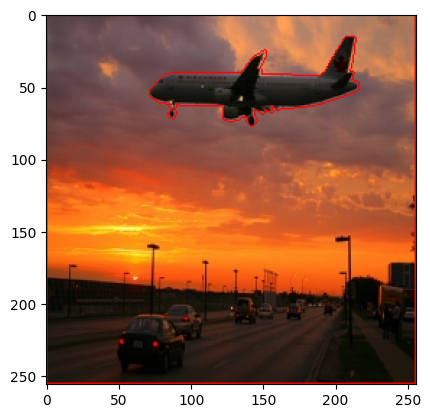

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
imgfile = '/root/code_dir/ControlNet_Seg/datasets/dataset/photo/airplane/n02691156_58.jpg'
pngfile = '8.png'

img = cv2.imread(imgfile, 1)
mask = cv2.imread(pngfile, 0)

# contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours, -1, (0, 0, 255), 1)

img = img[:, :, ::-1]
img[..., 2] = np.where(mask == 1, 255, img[..., 2])

plt.imshow(img)
plt.show()